In [1]:
import numpy as np
import pandas as pd
import collections
from sklearn.metrics import confusion_matrix, classification_report, balanced_accuracy_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d as plt3d
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC, SVC

# Zadanie 4

In [34]:
data = pd.read_csv("./131767-svm.txt", sep='\t')
data[:3]
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

In [35]:
classes_count = collections.Counter(y)
class_0_prc = classes_count[0]/(classes_count[1]+classes_count[0])
class_1_prc = 1 - class_0_prc
print("0: ", class_0_prc)
print("1: ", class_1_prc)

0:  0.7402
1:  0.25980000000000003


In [36]:
collections.Counter(X.dtypes)
# wszystkie atrybuty liczbowe

Counter({dtype('float64'): 119})

In [48]:
mean_df = pd.DataFrame(X.mean())
std_df = pd.DataFrame(X.std())
min_df = pd.DataFrame(X.min())
max_df = pd.DataFrame(X.max())

mean_std_df = mean_df.merge(std_df, left_index=True, right_index=True)
mean_std_df["std/mean"] = mean_std_df['0_y']/mean_std_df["0_x"]
mean_std_min_df = mean_std_df.merge(min_df, left_index=True, right_index=True)
mean_std_min_max_df = mean_std_min_df.merge(max_df, left_index=True, right_index=True)

mean_std_min_max_df.columns = ['mean', "std", "std/mean", 'min', 'max']
pd.DataFrame.round(mean_std_min_max_df,decimals=4).to_csv("./data_desc.csv")
mean_std_min_max_df

,mean,std,std/mean,min,max
dissim,0.004740,0.001257,0.265102,0.001272,0.015529
el0,0.618960,0.179363,0.289781,0.016103,0.963830
el1,0.231892,0.161531,0.696578,0.001310,0.961220
el2,0.103617,0.135753,1.310146,0.000346,0.966240
el3,0.067084,0.086823,1.294241,0.000185,0.920950
...,...,...,...,...,...
stat72,16.759097,7.327707,0.437238,-1.619100,27.032000
stat73,15.879577,7.959157,0.501220,-1.499400,27.032000
stat74,17.036289,7.197951,0.422507,-1.619100,27.032000
stat75,29.675829,16.772171,0.565180,-1.000300,90.528000


In [39]:
sca = StandardScaler()
X_std = sca.fit_transform(X)
X_std = pd.DataFrame(X_std, columns=X.columns)

mean_df = pd.DataFrame(X_std.mean())
std_df = pd.DataFrame(X_std.std())
min_df = pd.DataFrame(X_std.min())
max_df = pd.DataFrame(X_std.max())

mean_std_df = mean_df.merge(std_df, left_index=True, right_index=True)
mean_std_min_df = mean_std_df.merge(min_df, left_index=True, right_index=True)
mean_std_min_max_df = mean_std_min_df.merge(max_df, left_index=True, right_index=True)

mean_std_min_max_df.columns = ['mean', "std", 'min', 'max']
mean_std_min_max_df
pd.DataFrame.round(mean_std_min_max_df,decimals=4).to_csv("./data_std_desc.csv")
# mean_std_min_max_df

,mean,std,min,max
dissim,0.004740,0.001257,0.001272,0.015529
el0,0.618960,0.179363,0.016103,0.963830
el1,0.231892,0.161531,0.001310,0.961220
el2,0.103617,0.135753,0.000346,0.966240
el3,0.067084,0.086823,0.000185,0.920950
...,...,...,...,...
stat72,16.759097,7.327707,-1.619100,27.032000
stat73,15.879577,7.959157,-1.499400,27.032000
stat74,17.036289,7.197951,-1.619100,27.032000
stat75,29.675829,16.772171,-1.000300,90.528000


In [19]:
collections.Counter(mean_std_min_max_df['min']<0.001)

Counter({False: 10, True: 109})

In [28]:
collections.Counter((mean_std_min_max_df['max']>=0.9) & (mean_std_min_max_df['max']<=1))

Counter({False: 96, True: 23})

In [8]:
# Klasa większościowa to 0 ~74%. To byłaby trafność klasyfikatora Zero Rule.
y_pred = np.zeros(data.shape[0])
print(confusion_matrix(y, y_pred))
print(classification_report(y, y_pred))
print("balanced_accuracy_score: ", balanced_accuracy_score(y, y_pred, adjusted=False))

[[11103     0]
 [ 3897     0]]
              precision    recall  f1-score   support

           0       0.74      1.00      0.85     11103
           1       0.00      0.00      0.00      3897

    accuracy                           0.74     15000
   macro avg       0.37      0.50      0.43     15000
weighted avg       0.55      0.74      0.63     15000

balanced_accuracy_score:  0.5


D:\Instalowane\Programy\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [9]:
sensitivity = 0/(0+3897)
specificity = 11103/(11103+0)
G_mean = pow(sensitivity*specificity,0.5)
G_mean # 0

0.0

# Zadanie 5

In [65]:
sca = StandardScaler()
X_std = sca.fit_transform(X)

pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_std)

fig = plt.figure()
fig.set_size_inches(18.5, 10.5)
plt.scatter(X_pca[y==0][:,0], X_pca[y==0][:,1], color='red', edgecolor='black')
plt.scatter(X_pca[y==1][:,0], X_pca[y==1][:,1], color='blue', edgecolor='yellow')

plt.savefig("./rysunki/PCA_2D.svg")
print(": ", sum(pca.explained_variance_ratio_))

:  0.3499248874695394


In [ ]:
from matplotlib import interactive
%matplotlib qt  
# wx, gtk, osx, tk, empty uses default

pca = PCA(n_components=3, random_state=42)
X_pca = pca.fit_transform(X_std)[:15000]

fig = plt.figure()
fig.set_size_inches(18.5, 10.5)
ax = plt.axes(projection='3d')
y_5k = y[:15000]
ax.scatter3D(X_pca[y_5k==0][:,0], X_pca[y_5k==0][:,1], X_pca[y_5k==0][:,2], color='red', edgecolor='black')
ax.scatter3D(X_pca[y_5k==1][:,0], X_pca[y_5k==1][:,1], X_pca[y_5k==1][:,2], color='blue', edgecolor='yellow')
# ax.view_init(10, 0)
plt.savefig("./rysunki/PCA_3D.svg")
print(": ", sum(pca.explained_variance_ratio_))

# Zadanie 6

In [ ]:
# from sklearn.model_selection import StratifiedKFold
# skf  = StratifiedKFold(n_splits=2, shuffle=True)

# X = np.array([[1, 2], [3, 4], [1, 2], [3, 4]])
# y = np.array([0, 0, 1, 1])

# for train_index, test_index in skf.split(X, y):
#     print("TEST:", test_index , "TRAIN:", train_index)
#     X_train, X_test = X[train_index], X[test_index]
#     y_train, y_test = y[train_index], y[test_index]

'''
Jeśli dane są posortowane w jakiś sposób to włączenie/wyłączenie mieszania może mieć duży wpływ na uzyskaną trafność.
Załóżmy, iż mamy 100 przypadków uczących i używamy StratifiedFold z 5 foldami. Każdy fold składa się z 20 przypadków.
Powiedzmy, że posiadamy atrybut kolor oczu i pierwsze 20 przypadków to jedyne przypadki z niebieskim kolorem oczu.
W iteracji, w której te 20 przypadków będzie w foldzie przypadającym na zbiór testowy okaże się,
że w zbiorze treningowym nie będzie żadnego takiego przypadku i nasza trafność bardzo spadnie.

Z drugiej strony w innym przypadku może zdarzyć się odwrotna sytuacja, w której akurat kolor oczu niebieski
zawsze będzie prawidłowo klasyfikowany, choć próbki z inną wartością cechy wcale dobrze klasyfikowane być nie muszą.
Wtedy nasza trafność będzie zbytnio wysoka w tej iteracji.

Także warto włączać mieszanie, gdy dane są w jakiś sposób posortowane.
Jednak jeżeli dane są zależne czasowo, np. przez zmnieniajace się trendy to nie powinniśmy ich mieszać.
Dane uczące powinny być starsze w takim przypadku niż dane testowe.

''' 


# Zadanie 7

In [ ]:
'''
Parametr C odpowiada za wielkość marginesu błędu. Nie wpływa na sam sposób liczenia trafności ????.
Im większa wartość tym mniejszy margines i jest bardziej douczony do danych uczących. 
Parametr class_weight wpływa na wartość parametru C dla konkretnej klasy decyzyjnej. 
Czyli środek marginesu będzie bardziej lub mniej przesunięty w stronę którejś z klas decyzyjnych.
Wartość 'balanced' ustala wartość parametru class_weight odwrotnie proporcjonalnie do liczności klas.

balanced_accuracy nie jest przeskalowanym accuracy.
Jest to średnia z wartości sensitivity (recall) dla każdej klasy decyzyjnej ??? SPRAWDZIĆ DALEJ.

Czy mając zbiór 15k przypadków i 2 zrównoważone klasy, klasyfikator może z 10-krotnej CV 
uzyskiwać średnie balanced_accuracy<0.5? Jeśli tak, to w jakiej sytuacji?
Tak, może. Jeżeli mamy idealny klasyfikator, to recall dla każdej klasy wynosi 1.
Jeżeli mamy najgorszy klasyfikator, np. poprzez zamianę klas decyzyjnych perfekcyjengo klasyfikatora, to recall wynosi 0.
Z definicji balanced_accuracy to średnia wartości recall dla każdej klasy. Także w tym wypadku wyjdzie 0.
'''

# Zadanie 8

In [ ]:
# zero rule classifier
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split
from imblearn.metrics import geometric_mean_score as gmean
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, accuracy_score, balanced_accuracy_score
import time
import pickle
data = pd.read_csv("./131767-svm.txt", sep='\t')
data[:3]
X = data.iloc[:, :-1]
y = data.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

# Set the parameters by cross-validation
tuned_parameters = [{'kernel': ['rbf'], 
                     'gamma': ['auto'],
                     'C': [1],
                     'class_weight': [None]}]
#                     {'kernel': ['linear'], 
#                      'C': [1, 1000],
#                     'class_weight': ['balanced', None]}]

# tuned_parameters = [{'kernel': ['rbf'], 
#                      'C': [1, 1000]}]


tuned_parameters = {'kernel':('linear', 'rbf', 'sigmoid'),
              'C':[1, 10, 100]}

# tuned_parameters = {'kernel':['rbf', 'sigmoid', 'linear'],
#               'C':[1, ]}

scores_list = ['accuracy', 'balanced_accuracy']
start = time.time()
for score in scores_list:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(SVC(random_state=42), 
                       tuned_parameters, 
                       scoring=score,
                       cv=10,
                      n_jobs=7)
    
    clf.fit(X_train, y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred))
    print()
    pickle.dump(clf, open( score+str(time.time())+".pkl", "wb" ) )
    
print(time.time()-start)

# Tuning hyper-parameters for accuracy

Best parameters set found on development set:

{'C': 100, 'kernel': 'rbf'}

Grid scores on development set:

0.814 (+/-0.015) for {'C': 1, 'kernel': 'linear'}
0.788 (+/-0.011) for {'C': 1, 'kernel': 'rbf'}
0.610 (+/-0.045) for {'C': 1, 'kernel': 'sigmoid'}
0.828 (+/-0.023) for {'C': 10, 'kernel': 'linear'}
0.822 (+/-0.018) for {'C': 10, 'kernel': 'rbf'}
0.607 (+/-0.045) for {'C': 10, 'kernel': 'sigmoid'}
0.835 (+/-0.022) for {'C': 100, 'kernel': 'linear'}
0.841 (+/-0.024) for {'C': 100, 'kernel': 'rbf'}
0.607 (+/-0.046) for {'C': 100, 'kernel': 'sigmoid'}

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

              precision    recall  f1-score   support

           0       0.85      0.96      0.90      2248
           1       0.82      0.49      0.62       752

    accuracy                           0.85      3000
   macro avg       0.84      0.73      0.76

In [ ]:
# zero rule classifier
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split
from imblearn.metrics import geometric_mean_score as gmean
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import make_scorer, accuracy_score, balanced_accuracy_score
import time
data = pd.read_csv("./131767-svm.txt", sep='\t')
data[:3]
X = data.iloc[:, :-1]
y = data.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

# Set the parameters by cross-validation
tuned_parameters = [{'kernel': ['rbf'], 
                     'gamma': ['auto'],
                     'C': [1],
                     'class_weight': [None]}]

scores = {'accuracy': make_scorer(accuracy_score),
          'balanced_accuracy': make_scorer(balanced_accuracy_score)}
parameters = {'kernel':('linear', 'rbf', 'sigmoid'),
              'C':[1]}
for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()
    clf = GridSearchCV(SVC(),
                       param_grid=parameters,
                       scoring=score,
                       cv=StratifiedKFold(n_splits=10),
                       n_jobs=7)
    clf.fit(X_train, y_train)
    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()
 
    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred))
    print()
    dump(clf, "gscv_{}.joblib".format(int(time.time())))

# Tuning hyper-parameters for accuracy



In [ ]:
from sklearn.svm import LinearSVC, SVC
from sklearn.model_selection import train_test_split
from imblearn.metrics import geometric_mean_score as gmean
from skleanr.model_selection import KFold

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)
clf = SVC(random_state=42)
clf.fit(X_train, y_train)


y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))
print("balanced_accuracy_score: ", balanced_accuracy_score(y_test, y_pred, adjusted=False))
print(gmean(y_test, y_pred))

In [ ]:
# standarycja, bez użycia PCA
sca = StandardScaler()
X_train_std = sca.fit_transform(X_train)
X_test_std = sca.transform(X_test)

clf = LinearSVC(random_state=42)
clf.fit(X_train_std, y_train)


y_pred = clf.predict(X_test_std)
print(classification_report(y_test, y_pred))
print("balanced_accuracy_score: ", balanced_accuracy_score(y_test, y_pred, adjusted=False))

In [ ]:
# standaryzacja, PCA 3 wymiary
sca = StandardScaler()
X_train_std = sca.fit_transform(X_train)
X_test_std = sca.transform(X_test)

pca = PCA(n_components=119, random_state=42)
X_train_std_pca = pca.fit_transform(X_train_std)
X_test_std_pca = pca.transform(X_test_std)
print("explained_variance_ratio_: ", sum(pca.explained_variance_ratio_))

clf = SVC(random_state=42)
clf.fit(X_train_std_pca, y_train)


y_pred = clf.predict(X_test_std_pca)
print(classification_report(y_test, y_pred))
print("balanced_accuracy_score: ", balanced_accuracy_score(y_test, y_pred, adjusted=False))

In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.svm import SVC

print(__doc__)

# Loading the Digits dataset
digits = datasets.load_digits()

# To apply an classifier on this data, we need to flatten the image, to
# turn the data in a (samples, feature) matrix:
n_samples = len(digits.images)
X = digits.images.reshape((n_samples, -1))
y = digits.target

# Split the dataset in two equal parts
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.5, random_state=0)

# Set the parameters by cross-validation
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

scores = ['precision', 'recall']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(
        SVC(), tuned_parameters, scoring='%s_macro' % score
    )
    clf.fit(X_train, y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred))
    print()

# Note the problem is too easy: the hyperparameter plateau is too flat and the
# output model is the same for precision and recall with ties in quality.

In [ ]:
clf.cv_results_

0 0
0 1
0 2
0 3
1 0
1 1
1 2
1 3


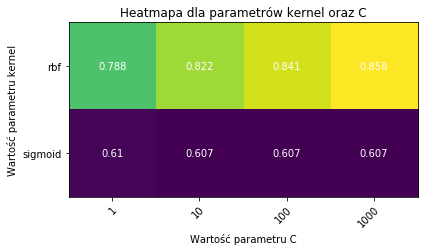

In [9]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
# sphinx_gallery_thumbnail_number = 2

C = [1, 10, 100, 1000]
kernels = ['rbf', 'sigmoid']

harvest = np.array([[0.788, 0.822, 0.841, 0.858],
                    [0.610, 0.607, 0.607, 0.607]])



fig, ax = plt.subplots()
im = ax.imshow(harvest)

# We want to show all ticks...
ax.set_xticks(np.arange(len(C)))
ax.set_yticks(np.arange(len(kernels)))
# ... and label them with the respective list entries
ax.set_xticklabels(C)
ax.set_yticklabels(kernels)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(kernels)):
    for j in range(len(C)):
        print(i,j)
        text = ax.text(j, i, harvest[i, j],
                       ha="center", va="center", color="w")

ax.set_title("Heatmapa wartości trafności")
ax.set_xlabel("Wartość parametru C")
ax.set_ylabel("Wartość parametru kernel")
fig.tight_layout()
plt.show()